In [1]:
# emaildetection.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud


In [5]:
# Load dataset
print("Loading dataset...")
df = pd.read_csv('C:/Users/bhard/OneDrive/Desktop/Emaildetectionproject/mail_data.csv')

Loading dataset...


In [9]:
# Display the first few rows and column names of the dataset
print("\nDataset loaded successfully. Here are the first few rows:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)


Dataset loaded successfully. Here are the first few rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Columns in the dataset:
Index(['Category', 'Message'], dtype='object')


In [11]:
# Map labels to binary values
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# Display the first few rows after mapping
print("\nData after mapping labels:")
print(df.head())


Data after mapping labels:
   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [13]:
# Split the dataset into features and labels
X = df['Message']
y = df['Category']

# Display the shapes of features and labels
print("\nFeatures and labels split successfully.")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features and labels split successfully.
Features shape: (5572,)
Labels shape: (5572,)


In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Create a pipeline that combines TF-IDF vectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

In [16]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



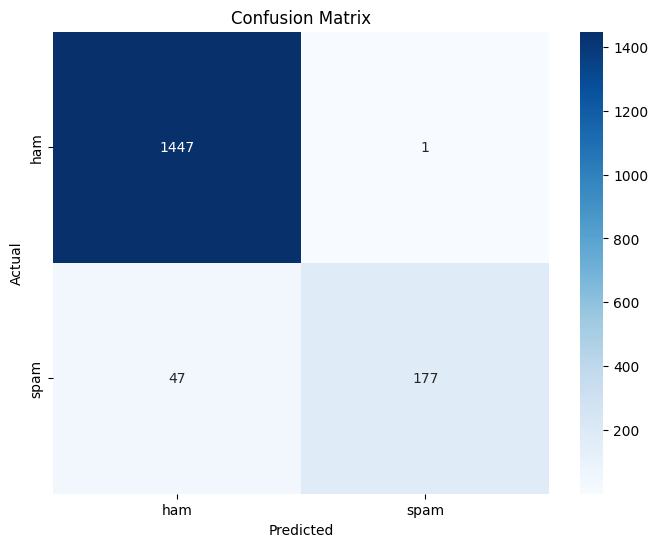

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


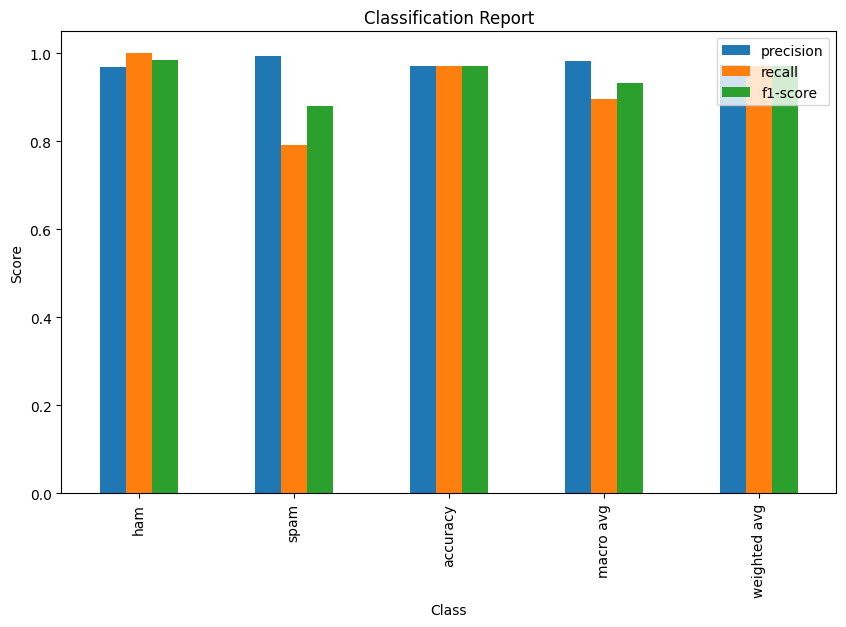

In [18]:
# Classification Report Visualization
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.show()

In [20]:
# Evaluate the model
print("\nEvaluating the model...")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672


Confusion Matrix:
[[1447    1]
 [  47  177]]


In [21]:
# Generate word clouds for spam and ham messages
print("\nGenerating word clouds...")

spam_messages = df[df['Category'] == 1]['Message']
ham_messages = df[df['Category'] == 0]['Message']


Generating word clouds...


In [22]:
# Combine all messages into a single string
spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)

In [23]:
# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

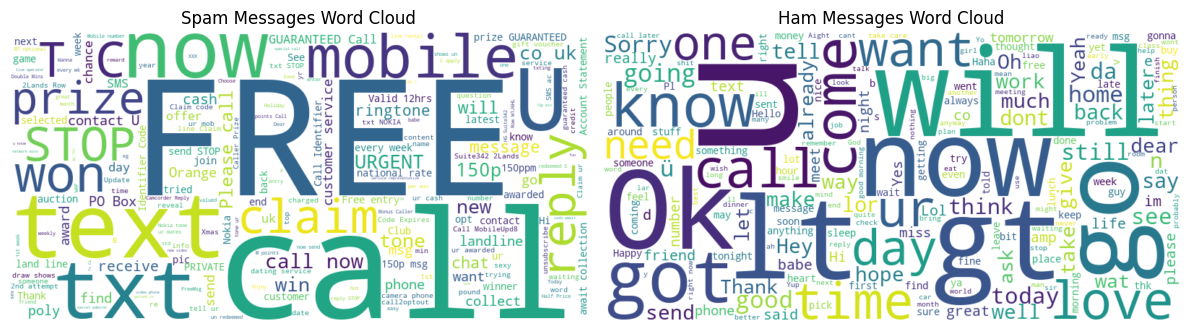

In [24]:
# Display word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()